# Imports

In [11]:
pip install openpyxl

In [4]:
pip install networkx

In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import matplotlib.cm as cm

In [43]:
# Load the file
df = pd.read_excel("/work/agreement_df_r2.xlsx")

agreement_df_r2.xlsx is later called Main_Agree_All_HAnn.xlsx in the files.

In [46]:
df

,title,post_id_x,comment_id,comment_author,text,platform,topic,affect_h_bs,availability_h_bs,representativeness_h_bs,...,all_or_nothing_ir,affect_h_wl,availability_h_wl,representativeness_h_wl,confirmation_b_wl,all_or_nothing_wl,Conversation ID,Tweet ID,Author ID,Created At
0,"""Our findings predict that a temperature incre...",1atygy6,NaN,NaN,0,Reddit,CC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Another warning from an insurance company,1asczho,NaN,NaN,0,Reddit,CC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Best estimated places to move to in North Amer...,1atzufx,NaN,NaN,"Sorry for the long title haha, just wondering ...",Reddit,CC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Biofuels are a problem,1asju6i,NaN,NaN,Destroying rain forest to grow sugarcane for b...,Reddit,CC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Books on climate change?,1asy26j,NaN,NaN,Hello! What's your recommendation for books th...,Reddit,CC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,NaN,NaN,NaN,NaN,Definitely AI. Look at the hands lol but out o...,Twitter,AI,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,'1765196270925230342,'1765196270925230342,'37123010,2024-03-06 02:02:41
2995,NaN,NaN,NaN,NaN,If ai so dangerous wit simple ways of picking ...,Twitter,AI,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,'1765499095857115377,'1765499095857115377,'778592167,2024-03-06 22:06:00
2996,NaN,NaN,NaN,NaN,Artificial intelligence! It is a deadly techno...,Twitter,AI,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,'1765995039069700210,'1765995039069700210,'294805094,2024-03-08 06:56:42
2997,NaN,NaN,NaN,NaN,The real danger posed by AI is the consolidati...,Twitter,AI,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,'1766163208862122260,'1766163208862122260,'1489987177031376905,2024-03-08 18:04:57


In [47]:
annotators = ['bs', 'fs', 'ir', 'wl']
bias_cols = ['affect_h', 'availability_h', 'representativeness_h', 'confirmation_b', 'all_or_nothing'

annotator_bias_cols = {
    'bs': ['affect_h_bs', 'availability_h_bs', 'representativeness_h_bs', 'confirmation_b_bs', 'all_or_nothing_bs'],
    'fs': ['affect_h_fs', 'availability_h_fs', 'representativeness_h_fs', 'confirmation_b_fs', 'all_or_nothing_fs'],
    'ir': ['affect_h_ir', 'availability_h_ir', 'representativeness_h_ir', 'confirmation_b_ir', 'all_or_nothing_ir'],
    'wl': ['affect_h_wl', 'availability_h_wl', 'representativeness_h_wl', 'confirmation_b_wl', 'all_or_nothing_wl']
}

# Perfect agreement

## Bias presence

In [8]:
mask_any_bias = pd.Series(True, index=df.index)
for annotator in annotator_bias_cols:
    mask = df[annotator_bias_cols[annotator]].eq(1).any(axis=1)
    mask_any_bias &= mask

perfect_any_bias = df[mask_any_bias]
perfect_any_bias.to_excel("/work/perfect_agreement_any_bias.xlsx", index=False)

In [7]:
perfect_any_bias

,title,post_id_x,comment_id,comment_author,text,platform,topic,affect_h_bs,availability_h_bs,representativeness_h_bs,...,all_or_nothing_ir,affect_h_wl,availability_h_wl,representativeness_h_wl,confirmation_b_wl,all_or_nothing_wl,Conversation ID,Tweet ID,Author ID,Created At
18,NaN,1asc8ph,kqqahs6,ubrlichter,I fail to see how this is a problem. The plane...,Reddit,CC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
662,NaN,1atygy6,kr3suzp,StrikeForceOne,I know that can happen it has happened before ...,Reddit,CC,NaN,1.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
685,NaN,1atygy6,kr7zjio,watching_whatever,Mankind is destroying every ecosystem right no...,Reddit,CC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
709,NaN,1au19bb,kr1xbr9,dipdotdash,"Makes sense to me. All the ""edges of habitabil...",Reddit,CC,NaN,1.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
950,NaN,1aun120,kr6weow,mzk-mzk,I worry about a big heatwave that kills a hund...,Reddit,CC,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1347,NaN,NaN,NaN,NaN,"@ClimateBen This needed to happen in 1970, lik...",Twitter,CC,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,'1766105807609901355,'1766146331540689328,'2492340883,2024-03-08 16:57:53
2373,NaN,1b0sl5n,ksctrdv,Itchyspot_,I honestly dont want ai to replace the creativ...,Reddit,AI,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2996,NaN,NaN,NaN,NaN,Artificial intelligence! It is a deadly techno...,Twitter,AI,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,'1765995039069700210,'1765995039069700210,'294805094,2024-03-08 06:56:42


## Specific biases

In [17]:
def get_agreed_biases(row):
    agreed = []
    for bias in bias_cols:
        if all(row[f"{bias}_{annotator}"] == 1 for annotator in annotators):
            agreed.append(bias)
 
    return ','.join(agreed)

df['common_biases'] = df.apply(get_agreed_biases, axis=1)

perfect_specific_bias = df[df['common_biases'] != '']

# Save the resulting DataFrame to an Excel file.
perfect_specific_bias.to_excel("perfect_agreement_specific_biases.xlsx", index=False)

In [12]:
perfect_specific_bias

,title,post_id_x,comment_id,comment_author,text,platform,topic,affect_h_bs,availability_h_bs,representativeness_h_bs,...,affect_h_wl,availability_h_wl,representativeness_h_wl,confirmation_b_wl,all_or_nothing_wl,Conversation ID,Tweet ID,Author ID,Created At,common_biases
950,NaN,1aun120,kr6weow,mzk-mzk,I worry about a big heatwave that kills a hund...,Reddit,CC,1.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,affect_h
2373,NaN,1b0sl5n,ksctrdv,Itchyspot_,I honestly dont want ai to replace the creativ...,Reddit,AI,1.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,affect_h
2996,NaN,NaN,NaN,NaN,Artificial intelligence! It is a deadly techno...,Twitter,AI,1.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,'1765995039069700210,'1765995039069700210,'294805094,2024-03-08 06:56:42,affect_h


In [24]:
perfect_specific_bias.value_counts('common_biases')

common_biases
affect_h    3
Name: count, dtype: int64

## No bias

In [15]:
annotation_columns = [f"{bias}_{annotator}" for bias in bias_cols for annotator in annotators]

for col in annotation_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

no_bias_posts = df[df[annotation_columns].sum(axis=1) == 0]

num_no_bias_posts = len(no_bias_posts)
print("Number of posts where no annotator flagged any bias:", num_no_bias_posts)

no_bias_posts.to_excel("/work/perfect_agreement_with_no_bias.xlsx", index=False)

Number of posts where no annotator flagged any bias: 1958


# Perfect disagreement

## Specific biases

In [14]:
def get_disagreed_biases(row):

    annotator_annotations = {}
    for annotator in annotators:
        flagged = [bias for bias in bias_cols if row[f"{bias}_{annotator}"] == 1]
        if not flagged:
            return ""
        annotator_annotations[annotator] = flagged

    all_flagged = []
    for annot in annotators:
        all_flagged.extend(annotator_annotations[annot])
    
    if len(set(all_flagged)) == sum(len(annotator_annotations[a]) for a in annotators):
        return "; ".join(f"{annotator}: {', '.join(annotator_annotations[annotator])}" for annotator in annotators)
    else:
        return ""

df["disagreed_biases"] = df.apply(get_disagreed_biases, axis=1)

perfect_disagreement = df[df["disagreed_biases"] != ""]

perfect_disagreement.to_excel("perfect_disagreement_specific_biases.xlsx", index=False)

## 

# 50:50 agreement

In [16]:
def get_disagreed_biases(row):
    """
    For each bias, check the four annotators' responses.
    If exactly 2 annotators marked the bias (i.e. value 1) and 2 did not,
    consider that perfect disagreement for the specific bias.
    """
    disagreed = []
    for bias in bias_cols:
        values = [row[f"{bias}_{annotator}"] for annotator in annotators]
        ones_count = sum(val == 1 for val in values)
        if ones_count == 2:
            disagreed.append(bias)
    return ','.join(disagreed)

df['disagreed_biases'] = df.apply(get_disagreed_biases, axis=1)

agreement_50 = df[df['disagreed_biases'] != '']

perfect_disagreement.to_excel("/work/50_50_agreement_specific_biases.xlsx", index=False)

In [20]:
agreement_50

,title,post_id_x,comment_id,comment_author,text,platform,topic,affect_h_bs,availability_h_bs,representativeness_h_bs,...,availability_h_wl,representativeness_h_wl,confirmation_b_wl,all_or_nothing_wl,Conversation ID,Tweet ID,Author ID,Created At,common_biases,disagreed_biases
29,NaN,1asc8ph,kqriw5g,hot_pink_bunny202,And? Whatever happens at this point all I want...,Reddit,CC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,affect_h
39,NaN,1asc8ph,kqw79c3,hot_pink_bunny202,Yea maybe 5yrs 10yrs 30yrs from now. I am more...,Reddit,CC,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,affect_h
59,NaN,1asczho,kqsyjd4,StrikeForceOne,Screw them for decades they got away with ripp...,Reddit,CC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,affect_h
99,NaN,1asju6i,kqu0zwt,Euoplocephalus_,The only method for a meaningful reduction in ...,Reddit,CC,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,,all_or_nothing
106,NaN,1asju6i,kquxega,LtMM_,You're ignoring possibly the most important fa...,Reddit,CC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,affect_h
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2909,NaN,NaN,NaN,NaN,@pepedownunder THEY ARE SATANISTS .... WE ARE ...,Twitter,AI,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,'1764804529655001537,'1765184081216545148,'1765088018694918146,2024-03-06 01:14:15,,affect_h
2915,NaN,NaN,NaN,NaN,@JmelzMD @pepedownunder You ugly Jew STFU. \n\...,Twitter,AI,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,'1764804529655001537,'1765205583991365724,'1753389256301572096,2024-03-06 02:39:41,,affect_h
2944,NaN,NaN,NaN,NaN,@pepedownunder Same thing in ancient Egypt. Th...,Twitter,AI,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,'1764804529655001537,'1765467137051701398,'1499794956407427074,2024-03-06 19:59:00,,availability_h
2972,NaN,NaN,NaN,NaN,@crickerbuns1 @pepedownunder It is good that m...,Twitter,AI,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,'1764804529655001537,'1765906359487230338,'1491184369037451264,2024-03-08 01:04:19,,confirmation_b


In [22]:
basic_biases = ['affect_h', 'availability_h', 'representativeness_h', 'confirmation_b', 'all_or_nothing']

counts = {bias: 0 for bias in basic_biases}

for entry in agreement_50['disagreed_biases']:
    if pd.notna(entry) and entry.strip() != '':
        # Split the entry on commas and remove extra whitespace
        heuristics = [h.strip() for h in entry.split(',')]
        # Increment the count for each bias if it is one of the basic biases
        for heuristic in heuristics:
            if heuristic in counts:
                counts[heuristic] += 1

counts_df = pd.DataFrame(list(counts.items()), columns=['Bias', 'Count'])
print(counts_df)

                   Bias  Count
0              affect_h     99
1        availability_h     19
2  representativeness_h      5
3        confirmation_b     34
4        all_or_nothing     14


In [14]:
_dntk.DeepnoteChart(perfect_disagreement, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#2266D3","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"type":"nominal","field":"disagreed_biases","scale":{"type":"linear"}},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"count","formatType":"numberFormatFromNumberType"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""")

## Bias combinations

In [24]:
df50 = agreement_50.copy()

In [26]:
# Analyze distribution of votes per bias
print("Vote Distribution per Bias:")
for bias in basic_biases:
    cols = [f"{bias}_{a}" for a in annotators if f"{bias}_{a}" in df50.columns]
    vote_counts = df50[cols].apply(lambda row: sum(1 for v in row if v == 1), axis=1)
    distribution = vote_counts.value_counts().sort_index()
    print(f"\nDistribution for {bias}:")
    print(distribution)

Vote Distribution per Bias:

Distribution for affect_h:
0    33
1    27
2    99
3     1
Name: count, dtype: int64

Distribution for availability_h:
0    117
1     23
2     19
3      1
Name: count, dtype: int64

Distribution for representativeness_h:
0    146
1      9
2      5
Name: count, dtype: int64

Distribution for confirmation_b:
0    102
1     24
2     34
Name: count, dtype: int64

Distribution for all_or_nothing:
0    128
1     18
2     14
Name: count, dtype: int64


In [28]:
def compute_50_biases(row):
    """
    For each row in the 50% dataset:
      - Computes the vote counts for each bias.
      - Determines majority biases as those with exactly 2 votes.
        If none have exactly 2 votes, then it uses the bias (or biases)
        with the maximum count (if >0).
      - Determines minority biases as those with exactly 1 vote.
    
    Returns a pd.Series with:
      'majority_bias': a list of one or more majority biases,
      'minority_bias_1': first minority bias (empty if none),
      'minority_bias_2': second minority bias (empty if only one exists).
    """
    counts = {}
    for bias in basic_biases:
        cols = [f"{bias}_{a}" for a in annotators if f"{bias}_{a}" in row.index]
        counts[bias] = sum(1 for vote in [row[col] for col in cols] if vote == 1)
    
    majority = [bias for bias, cnt in counts.items() if cnt == 2]

    if not majority:
        max_count = max(counts.values())
        if max_count > 0:
            majority = [bias for bias, cnt in counts.items() if cnt == max_count]
    
    minority = [bias for bias, cnt in counts.items() if cnt == 1]
    
    mb1 = minority[0] if len(minority) > 0 else ""
    mb2 = minority[1] if len(minority) > 1 else ""
    
    return pd.Series({
        'majority_bias': majority,
        'minority_bias_1': mb1,
        'minority_bias_2': mb2
    })

df50 = pd.read_excel("/work/50_50_agreement_specific_biases.xlsx")

bias_df = df50.apply(compute_50_biases, axis=1)
df50 = pd.concat([df50, bias_df], axis=1)

df50_exploded = df50.explode('majority_bias')

print("Sample of exploded rows (showing majority and minority biases):")
print(df50_exploded[['majority_bias', 'minority_bias_1', 'minority_bias_2']].head())

Sample of exploded rows (showing majority and minority biases):
    majority_bias minority_bias_1 minority_bias_2
0        affect_h  availability_h                
1        affect_h  availability_h                
2        affect_h                                
3  all_or_nothing        affect_h                
4        affect_h                                


In [30]:
#Group by combination of biases and count them  #

combination_counts_50 = df50_exploded.groupby(['majority_bias', 'minority_bias_1', 'minority_bias_2']).size().reset_index(name='count')
print("\nCombination Counts:")
print(combination_counts_50)


Combination Counts:
           majority_bias       minority_bias_1       minority_bias_2  count
0               affect_h                                                 53
1               affect_h        all_or_nothing                           11
2               affect_h        availability_h                            9
3               affect_h        availability_h        confirmation_b      6
4               affect_h        availability_h  representativeness_h      3
5               affect_h        confirmation_b                           11
6               affect_h        confirmation_b        all_or_nothing      2
7               affect_h  representativeness_h                            3
8               affect_h  representativeness_h        confirmation_b      1
9         all_or_nothing                                                  5
10        all_or_nothing              affect_h                            8
11        all_or_nothing              affect_h        confirmation_

# 3/4 agreement

## Specific biases

In [50]:
def get_majority_biases(row):
    """
    For a given row, check each bias in bias_names.
    If exactly 3 out of 4 annotators flagged that bias (i.e. value 1),
    include that bias in the returned string.
    """
    majority = []
    for bias in bias_cols:
        count = sum(row[f"{bias}_{annotator}"] == 1 for annotator in annotators)
        if count == 3:
            majority.append(bias)
    return ','.join(majority)

df['majority_biases'] = df.apply(get_majority_biases, axis=1)
majority_agreement = df[df['majority_biases'] != '']

majority_agreement.to_excel("/work/majority_agreement_specific_biases.xlsx", index=False)

In [53]:
majority_agreement

,title,post_id_x,comment_id,comment_author,text,platform,topic,affect_h_bs,availability_h_bs,representativeness_h_bs,...,affect_h_wl,availability_h_wl,representativeness_h_wl,confirmation_b_wl,all_or_nothing_wl,Conversation ID,Tweet ID,Author ID,Created At,majority_biases
18,NaN,1asc8ph,kqqahs6,ubrlichter,I fail to see how this is a problem. The plane...,Reddit,CC,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,confirmation_b
28,NaN,1asc8ph,kqrgl94,ubrlichter,"First of all, there's no one who knows if the ...",Reddit,CC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,confirmation_b
69,NaN,1asczho,kr2uxu9,DonTaddeo,That is why we need regulations.\n\nThere are ...,Reddit,CC,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,availability_h
174,NaN,1askodp,kqsydih,Marc_Op,Where I live (Northern Italy) the disappearanc...,Reddit,CC,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,availability_h
338,NaN,1ata25p,kr0itju,LackmustestTester,> Oh good. You agree that CO2 causes warming.\...,Reddit,CC,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,confirmation_b
447,NaN,1atqkbp,kr01sb1,Tpaine63,Wind does kill. Or at least the effect of wind...,Reddit,CC,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,availability_h
662,NaN,1atygy6,kr3suzp,StrikeForceOne,I know that can happen it has happened before ...,Reddit,CC,NaN,1.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,affect_h
688,NaN,1atygy6,kr9sast,watching_whatever,"The Earth’s core is cooling, outer space is fr...",Reddit,CC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,confirmation_b
701,NaN,1atzufx,kr1g8u8,EricInthecircle,Choose the natural disaster due to climate cha...,Reddit,CC,NaN,1.0,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,availability_h
709,NaN,1au19bb,kr1xbr9,dipdotdash,"Makes sense to me. All the ""edges of habitabil...",Reddit,CC,NaN,1.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,availability_h


In [59]:
full_names = {
    "affect_h": "Affect heuristic",
    "availability_h": "Availability heuristic",
    "representativeness_h": "Representativeness heuristic",
    "confirmation_b": "Confirmation bias",
    "all_or_nothing": "All-or-nothing thinking"
}

In [68]:
cmap_full = cm.get_cmap("PuBu")
palette_light = [cmap_full(0.25), cmap_full(0.60)]
palette_light = [tuple(c[:3]) for c in palette_light]

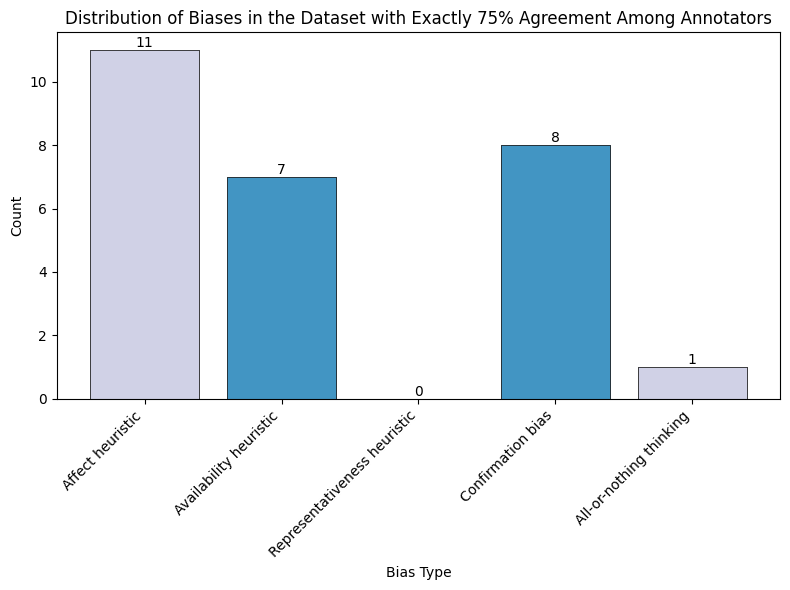

In [110]:
counts = (
    df['majority_biases']
    .value_counts()
    .reindex(full_names.keys(), fill_value=0)
)

labels = [full_names[k] for k in counts.index]
colors = [palette_light[i % len(palette_light)] for i in range(len(counts))]

plt.figure(figsize=(8, 6))
plt.bar(labels, counts.values, color=colors, edgecolor="0.1", linewidth=0.5)
bars = plt.bar(labels, counts.values, color=colors, edgecolor="0.1", linewidth=0.5)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height,                             
        f"{int(height)}",                  
        ha='center',                        
        va='bottom'                         
    )


plt.xlabel('Bias Type')
plt.ylabel('Count')
plt.title("Distribution of Biases in the Dataset with Exactly 75% Agreement Among Annotators")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## No bias

In [19]:
def get_majority_no_biases(row):
    """
    For a given row, check each bias in bias_cols.
    If exactly 3 out of 4 annotators indicated no bias (i.e. value 0)
    for that bias, include that bias in the returned string.
    """
    majority_no_biases = []
    for bias in bias_cols:
        count_no_bias = sum(row[f"{bias}_{annotator}"] == 0 for annotator in annotators)
        if count_no_bias == 3:  
            majority_no_biases.append(bias)
    return ','.join(majority_no_biases)

df['majority_no_biases'] = df.apply(get_majority_no_biases, axis=1)
majority_no_bias = df[df['majority_no_biases'] != '']

print("Number of posts with 75% agreement for no bias (exactly 3 out of 4):", len(majority_no_bias))

Number of posts with 75% agreement for no bias (exactly 3 out of 4): 0


### Bias combinations

In [34]:
def compute_75_biases(row):
    """
    For each row in the 75% dataset:
      - Majority bias: biases with at least 3 votes (75% agreement). If none meet that threshold, fallback to the bias(es)
        with the maximum vote count (if >0).
      - Minority biases: biases with exactly 1 vote.
    
    Returns a pd.Series with:
      'majority_bias': a list of majority biases (if more than one, later exploded into separate rows),
      'minority_bias_1': the first minority bias (empty string if none),
      'minority_bias_2': the second minority bias (empty string if only one exists).
    """
    counts = {}
    for bias in basic_biases:
        cols = [f"{bias}_{a}" for a in annotators if f"{bias}_{a}" in row.index]
        counts[bias] = sum(1 for vote in (row[col] for col in cols) if vote == 1)
    
    majority = [bias for bias, cnt in counts.items() if cnt >= 3]
    if not majority:
        max_count = max(counts.values())
        if max_count > 0:
            majority = [bias for bias, cnt in counts.items() if cnt == max_count]
    
    minority = [bias for bias, cnt in counts.items() if cnt == 1]
    
    mb1 = minority[0] if len(minority) > 0 else ""
    mb2 = minority[1] if len(minority) > 1 else ""
    
    return pd.Series({
        'majority_bias': majority,
        'minority_bias_1': mb1,
        'minority_bias_2': mb2
    })

bias_df_75 = majority_agreement.apply(compute_75_biases, axis=1)
majority_agreement = pd.concat([majority_agreement, bias_df_75], axis=1)
majority_agreement_exploded = majority_agreement.explode('majority_bias')

combination_counts_75 = majority_agreement_exploded.groupby(['majority_bias', 'minority_bias_1', 'minority_bias_2']).size().reset_index(name='count')

# Bias co-occurence and combinations

In [40]:
combination_counts_75 = combination_counts_75.rename(columns={'minority_bias': 'minority_bias_1'})
combination_counts_75['minority_bias_2'] = ""

merged = combination_counts_50.merge(
    combination_counts_75,
    on=['majority_bias', 'minority_bias_1', 'minority_bias_2'],
    how='outer',
    suffixes=('_50', '_75')
)

merged['count_50'] = merged['count_50'].fillna(0).astype(int)
merged['count_75'] = merged['count_75'].fillna(0).astype(int)

print(merged)

           majority_bias       minority_bias_1       minority_bias_2  \
0               affect_h                                               
1               affect_h        all_or_nothing                         
2               affect_h        availability_h                         
3               affect_h        availability_h        confirmation_b   
4               affect_h        availability_h  representativeness_h   
5               affect_h        confirmation_b                         
6               affect_h        confirmation_b        all_or_nothing   
7               affect_h  representativeness_h                         
8               affect_h  representativeness_h        confirmation_b   
9         all_or_nothing                                               
10        all_or_nothing              affect_h                         
11        all_or_nothing              affect_h        confirmation_b   
12        availability_h                                        

In [42]:
merged

,majority_bias,minority_bias_1,minority_bias_2,count_50,count_75
0,affect_h,,,53,8
1,affect_h,all_or_nothing,,11,1
2,affect_h,availability_h,,9,3
3,affect_h,availability_h,confirmation_b,6,0
4,affect_h,availability_h,representativeness_h,3,0
5,affect_h,confirmation_b,,11,1
6,affect_h,confirmation_b,all_or_nothing,2,0
7,affect_h,representativeness_h,,3,0
8,affect_h,representativeness_h,confirmation_b,1,0
9,all_or_nothing,,,5,0


In [44]:
merged['majority_bias'] = merged['majority_bias'].fillna("")
merged['minority_bias_1'] = merged['minority_bias_1'].fillna("")
merged['minority_bias_2'] = merged['minority_bias_2'].fillna("")

mask_to_remove = (merged['minority_bias_1'] == "") & \
                 (merged['minority_bias_2'] == "") & \
                 (~merged['majority_bias'].str.contains(','))


filtered_merged = merged[~mask_to_remove]
print(filtered_merged)

           majority_bias       minority_bias_1       minority_bias_2  \
1               affect_h        all_or_nothing                         
2               affect_h        availability_h                         
3               affect_h        availability_h        confirmation_b   
4               affect_h        availability_h  representativeness_h   
5               affect_h        confirmation_b                         
6               affect_h        confirmation_b        all_or_nothing   
7               affect_h  representativeness_h                         
8               affect_h  representativeness_h        confirmation_b   
10        all_or_nothing              affect_h                         
11        all_or_nothing              affect_h        confirmation_b   
13        availability_h              affect_h                         
14        availability_h        confirmation_b                         
16        confirmation_b              affect_h                  

In [46]:
filtered_merged.loc[:, 'total_count'] = filtered_merged['count_50'] + filtered_merged['count_75']

In [48]:
edge_weights = defaultdict(int)
for idx, row in filtered_merged.iterrows():
    majority = row['majority_bias']
    total_count = row['total_count']
    
    if row['minority_bias_1'] != "":
        pair = tuple(sorted([majority, row['minority_bias_1']]))
        edge_weights[pair] += total_count
        
    if row['minority_bias_2'] != "":
        pair = tuple(sorted([majority, row['minority_bias_2']]))
        edge_weights[pair] += total_count

In [50]:
sorted_edges = sorted(edge_weights.items(), key=lambda x: x[1], reverse=True)
print("Aggregated edge counts (sorted by weight descending):")
for pair, weight in sorted_edges:
    print(f"{pair}: {weight}")

Aggregated edge counts (sorted by weight descending):
('affect_h', 'confirmation_b'): 43
('affect_h', 'availability_h'): 26
('affect_h', 'all_or_nothing'): 25
('availability_h', 'confirmation_b'): 10
('affect_h', 'representativeness_h'): 7
('confirmation_b', 'representativeness_h'): 5
('all_or_nothing', 'confirmation_b'): 3
('availability_h', 'representativeness_h'): 2


## Visualisation

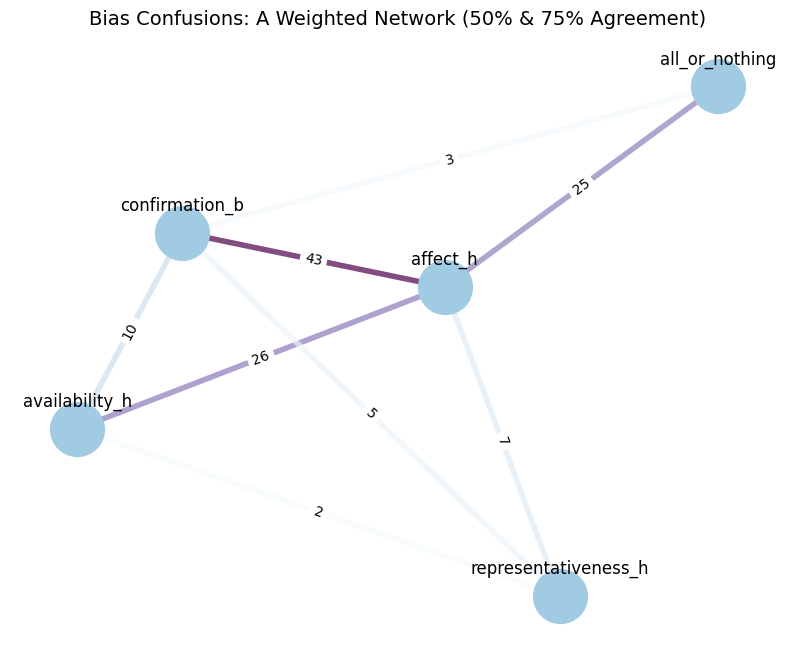

In [76]:
edge_weights = {
    ('affect_h', 'confirmation_b'): 43,
    ('affect_h', 'availability_h'): 26,
    ('affect_h', 'all_or_nothing'): 25,
    ('availability_h', 'confirmation_b'): 10,
    ('affect_h', 'representativeness_h'): 7,
    ('confirmation_b', 'representativeness_h'): 5,
    ('all_or_nothing', 'confirmation_b'): 3,
    ('availability_h', 'representativeness_h'): 2
}

G = nx.Graph()
for pair, weight in edge_weights.items():
    node1, node2 = pair
    G.add_edge(node1, node2, weight=weight)

pos = nx.spring_layout(G, seed=63)

edge_colors = [data['weight'] for u, v, data in G.edges(data=True)]
vmin = min(edge_colors)
vmax = max(edge_colors)

plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, node_color="#A0CBE2", node_size=1500)
nx.draw_networkx_edges(
    G, pos, 
    edge_color=edge_colors, 
    edge_cmap=plt.cm.BuPu, 
    width=4, 
    alpha=0.7,
    edge_vmin=vmin,     # Set the minimum weight value
    edge_vmax=vmax      # Set the maximum weight value
)

label_pos = {node: (coords[0], coords[1] + 0.1) for node, coords in pos.items()}
nx.draw_networkx_labels(G, pos=label_pos, font_size=12)

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=10)

plt.title("Bias Confusions: A Weighted Network (50% & 75% Agreement)", fontsize=14)
plt.axis('off')
plt.show()

In [56]:
sorted_edges = sorted(edge_weights.items(), key=lambda x: x[1], reverse=True)
print("Aggregated edge counts (sorted by weight descending):")
for pair, weight in sorted_edges:
    print(f"{pair}: {weight}")

Aggregated edge counts (sorted by weight descending):
('affect_h', 'confirmation_b'): 43
('affect_h', 'availability_h'): 26
('affect_h', 'all_or_nothing'): 25
('availability_h', 'confirmation_b'): 10
('affect_h', 'representativeness_h'): 7
('confirmation_b', 'representativeness_h'): 5
('all_or_nothing', 'confirmation_b'): 3
('availability_h', 'representativeness_h'): 2


# Gold standard

In [10]:
def get_gold_biases(row):
    """
    For each bias, check the four annotators' responses.
    If 2 or more annotators marked the bias (i.e. value 1),
    consider that bias as “disagreed” for that row.
    """
    disagreed = []
    for bias in bias_cols:
        values = [row[f"{bias}_{annotator}"] for annotator in annotators]
        ones_count = sum(val == 1 for val in values)
        if ones_count >= 2:
            disagreed.append(bias)
    return ','.join(disagreed)

df['gold_biases'] = df.apply(get_gold_biases, axis=1)

agreement_gold = df[df['gold_biases'] != '']

In [13]:
agreement_gold

,title,post_id_x,comment_id,comment_author,text,platform,topic,affect_h_bs,availability_h_bs,representativeness_h_bs,...,affect_h_wl,availability_h_wl,representativeness_h_wl,confirmation_b_wl,all_or_nothing_wl,Conversation ID,Tweet ID,Author ID,Created At,gold_biases
18,NaN,1asc8ph,kqqahs6,ubrlichter,I fail to see how this is a problem. The plane...,Reddit,CC,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,confirmation_b
28,NaN,1asc8ph,kqrgl94,ubrlichter,"First of all, there's no one who knows if the ...",Reddit,CC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,confirmation_b
29,NaN,1asc8ph,kqriw5g,hot_pink_bunny202,And? Whatever happens at this point all I want...,Reddit,CC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,affect_h
39,NaN,1asc8ph,kqw79c3,hot_pink_bunny202,Yea maybe 5yrs 10yrs 30yrs from now. I am more...,Reddit,CC,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,affect_h
59,NaN,1asczho,kqsyjd4,StrikeForceOne,Screw them for decades they got away with ripp...,Reddit,CC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,affect_h
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2944,NaN,NaN,NaN,NaN,@pepedownunder Same thing in ancient Egypt. Th...,Twitter,AI,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,'1764804529655001537,'1765467137051701398,'1499794956407427074,2024-03-06 19:59:00,availability_h
2972,NaN,NaN,NaN,NaN,@crickerbuns1 @pepedownunder It is good that m...,Twitter,AI,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,'1764804529655001537,'1765906359487230338,'1491184369037451264,2024-03-08 01:04:19,confirmation_b
2979,NaN,NaN,NaN,NaN,@pepedownunder @JmelzMD Zionist Jews need to a...,Twitter,AI,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,'1764804529655001537,'1766015790053298223,'1303667516225454080,2024-03-08 08:19:09,affect_h
2996,NaN,NaN,NaN,NaN,Artificial intelligence! It is a deadly techno...,Twitter,AI,1.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,'1765995039069700210,'1765995039069700210,'294805094,2024-03-08 06:56:42,affect_h


In [25]:
agreement_gold = agreement_gold[['title', 'text', 'platform', 'topic', 'gold_biases']]
agreement_gold

,title,text,platform,topic,gold_biases
18,NaN,I fail to see how this is a problem. The plane...,Reddit,CC,confirmation_b
28,NaN,"First of all, there's no one who knows if the ...",Reddit,CC,confirmation_b
29,NaN,And? Whatever happens at this point all I want...,Reddit,CC,affect_h
39,NaN,Yea maybe 5yrs 10yrs 30yrs from now. I am more...,Reddit,CC,affect_h
59,NaN,Screw them for decades they got away with ripp...,Reddit,CC,affect_h
...,...,...,...,...,...
2944,NaN,@pepedownunder Same thing in ancient Egypt. Th...,Twitter,AI,availability_h
2972,NaN,@crickerbuns1 @pepedownunder It is good that m...,Twitter,AI,confirmation_b
2979,NaN,@pepedownunder @JmelzMD Zionist Jews need to a...,Twitter,AI,affect_h
2996,NaN,Artificial intelligence! It is a deadly techno...,Twitter,AI,affect_h


## Saving the file

In [28]:
agreement_gold.to_excel("/work/gold_standard.xlsx", index=False)

print("File saved: gold_standard.xlsx'")

File saved: gold_standard.xlsx'


## Visualisations

In [14]:
agreement_gold = pd.read_excel("/work/gold_standard.xlsx")

In [17]:
agreement_gold.describe()

,title,text,platform,topic,gold_biases
count,1,188,188,188,188
unique,1,188,2,2,11
top,Just a reminder: we've been on an exponential ...,I fail to see how this is a problem. The plane...,Reddit,CC,affect_h
freq,1,1,139,103,103


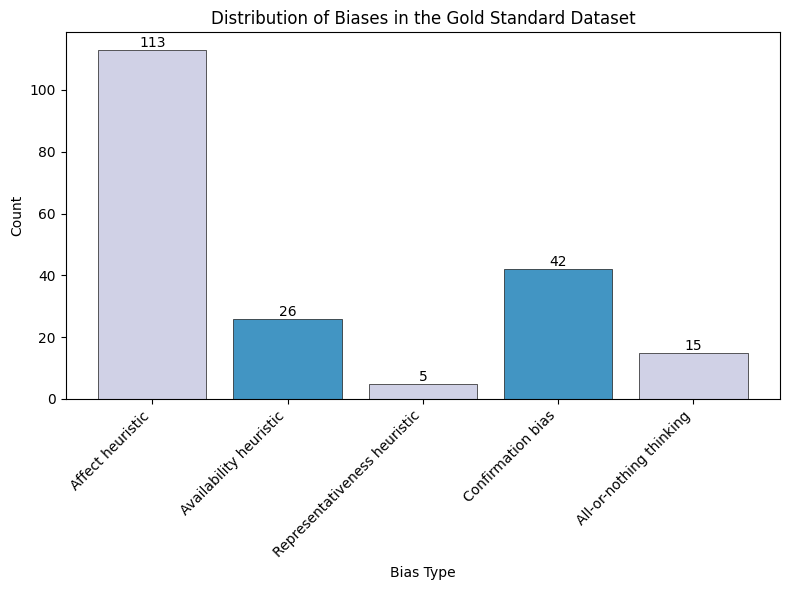

In [107]:
gold_series = (
    agreement_gold['gold_biases']
    .str.split(',') 
    .explode()       
    .dropna()         
)
counts = (
    gold_series
    .value_counts()
    .reindex(full_names.keys(), fill_value=0)
)

labels = [full_names[k] for k in counts.index]
colors = [palette_light[i % len(palette_light)] for i in range(len(counts))]

plt.figure(figsize=(8, 6))
bars = plt.bar(
    labels,
    counts.values,
    color=colors,
    edgecolor="0.1",
    linewidth=0.5
)

for bar in bars:
    h = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        h,
        str(int(h)),
        ha='center',
        va='bottom'
    )

plt.xlabel('Bias Type')
plt.ylabel('Count')
plt.title("Distribution of Biases in the Gold Standard Dataset")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [31]:
df_expanded = agreement_gold.assign(
    bias=agreement_gold['gold_biases'].str.split(',')
).explode('bias')

# Table 1: Counts of each individual bias by topic (CC vs AI)
bias_by_topic = df_expanded.groupby(['bias', 'topic']).size().unstack(fill_value=0)

# Table 2: Counts of each individual bias by platform (Reddit vs X/Twitter)
bias_by_platform = df_expanded.groupby(['bias', 'platform']).size().unstack(fill_value=0)

In [40]:
print(bias_by_topic)

topic                 AI  CC
bias                        
affect_h              67  46
all_or_nothing         7   8
availability_h         5  21
confirmation_b        10  32
representativeness_h   2   3


In [43]:
print(bias_by_platform)

platform              Reddit  Twitter
bias                                 
affect_h                  82       31
all_or_nothing            13        2
availability_h            21        5
confirmation_b            32       10
representativeness_h       2        3


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=57b17465-b515-43be-9dff-cc539004fde2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>